In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [2]:
qiskit.__qiskit_version__ #pip install qiskit-machine-learning

{'qiskit': '0.45.0', 'qiskit-aer': '0.13.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
# Use Aer's AerSimulator
simulator = AerSimulator()

In [4]:
# Create a Quantum Circuit acting on the q register
circuit1 = QuantumCircuit(2, 2)
# Here, you are initializing with 2 qubits in the zero state; with 2 classical bits set to zero; and circuit1 is the quantum circuit.
# QuantumCircuit(int, int)

In [5]:
# Add a H gate on qubit 0
circuit1.h(0) # A Hadamard gate H on qubit 0, which puts it into a superposition state.

In [6]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit1.cx(0, 1) # A controlled-Not operation (CNOT) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.

In [7]:
#circuit1.cx(0,2)
#circuit1.h(2)
#circuit1.cx(2,1)

In [8]:
# Map the quantum measurement to the classical bits
circuit1.measure([0, 1], [0, 1]) 
# if you pass the entire quantum and classical registers to measure, 
# the ith qubit’s measurement result will be stored in the ith classical bit.

In [9]:
# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit1, simulator)

In [10]:
# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

In [11]:
# Grab results from the job
result = job.result()

In [12]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)


Total count for 00 and 11 are: {'11': 526, '00': 474}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


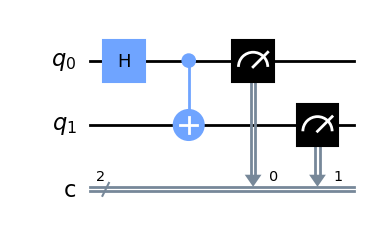

In [13]:
# Draw the circuit
circuit1.draw("mpl")
# You can use qiskit.circuit.QuantumCircuit.draw() 
# to view the circuit that you have designed in the 
# various forms used in many textbooks and research articles.

In [14]:
#You can use any of the valid circuit drawer backends 
# as the value for this config, this includes 
# text, mpl, latex, and latex_source.
circuit1.draw("text")
#circuit1.draw("mpl")

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [15]:
#circuit1.draw("latex")

In [16]:
circuit1.draw("latex_source")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qiskit/visualization/circuit/latex.py:154: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, _ = load_style(style)


'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{H}} & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\qw & \\targ & \\qw & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{c} :  }} & \\lstick{\\mathrm{{c} :  }} & \\lstick{/_{_{2}}} \\cw & \\cw & \\dstick{_{_{\\hspace{0.0em}0}}} \\cw \\ar @{<=} [-2,0] & \\dstick{_{_{\\hspace{0.0em}1}}} \\cw \\ar @{<=} [-1,0] & \\cw & \\cw\\\\\n\\\\ }}\n\\end{document}'

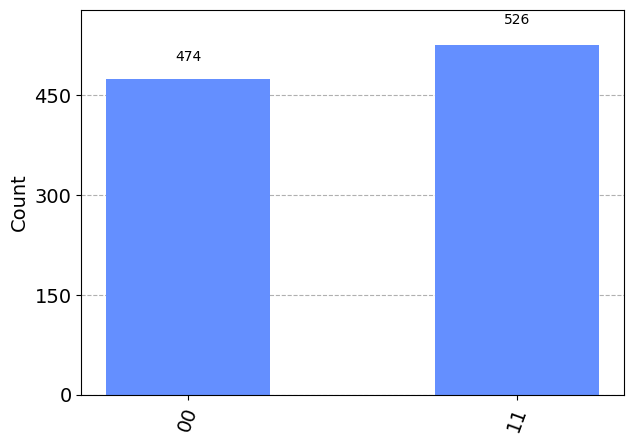

In [17]:
# Plot a histogram
plot_histogram(counts)